1. Создание Series

1.1. Импортируем нужные библиотеки.

In [ ]:
import numpy as np
import pandas as pd

1.2. Самый простой способ создать Series – это передать в качестве единственного параметра в конструктор класса список Python.

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5])
print(s1)

1.3.

In [6]:
s2 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
print(s2)

a    1
b    2
c    3
d    4
e    5
dtype: int64


2. Создание Series из ndarray массива из Numpy.

2.1 Создадим простой массив из пяти чисел.

In [171]:
ndarr = np.array([1, 2, 3, 4, 5])
type(ndarr)

numpy.ndarray

2.2. Создадим Series с буквенными метками.

In [173]:
s3 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])
print(s3)

a    1
b    2
c    3
d    4
e    5
dtype: int32


3. Создадим Series из словаря (dict).

In [18]:
d = {'a':1, 'b':2, 'c':3}
s4 = pd.Series(d)
print(s4)

a    1
b    2
c    3
dtype: int64


4. Создание Series с использованием константы. 

In [21]:
a=7
s5 = pd.Series(a, ['a', 'b', 'c'])
print(s5)

a    7
b    7
c    7
dtype: int64


5. Работа с элементами Series.

5.1. обращение к элементам Series по численному индексу.

In [190]:
s6 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
print(s6[2])
print(s6['d'])
print(s6[:2])
print(s6[s6 <= 3])

3
4
a    1
b    2
dtype: int64
a    1
b    2
c    3
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19188\3822981573.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s6[2])


5.2. Со структурами Series можно работать как с векторами: складывать, умножать вектор на число и т.п.

In [28]:
s7 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd','e'])
print(s6 + s7)
print(s6 * 3)

a    11
b    22
c    33
d    44
e    55
dtype: int64
a     3
b     6
c     9
d    12
e    15
dtype: int64


6. Позиционная индексация (iloc).

In [31]:
import pandas as pd
s = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])
print(s.iloc[0])
print(s.iloc[2])
print(s.iloc[-1])

10
30
50


7. Меточная индексация (loc).

In [34]:
print(s.loc['a'])
print(s.loc['c'])
print(s.loc['e'])

10
30
50


8. Разница в срезах (iloc vs loc).

iloc[start:stop] – **крайний индекс не включается**, как в стандартных
срезах Python.

loc[start:stop] – **крайний индекс включается** в выборку.

In [37]:
print(s.iloc[1:3])
print(s.loc['b':'d'])

b    20
c    30
dtype: int64
b    20
c    30
d    40
dtype: int64


9. Использование логической индексации для фильтрации данных в Series.

9.1. При логической индексации создается булевый массив.

In [41]:
import pandas as pd
s = pd.Series([10, 25, 8, 30, 15], index=['a', 'b', 'c', 'd', 'e'])
filtered_s = s[s > 10]
print(filtered_s)

b    25
d    30
e    15
dtype: int64


9.1. Создание логического массива. При применении логического выражения к Series создается булевый массив, который можно вывести отдельно:

In [44]:
print(s > 10)

a    False
b     True
c    False
d     True
e     True
dtype: bool


9.2. Комбинированные условия. Можно задавать **несколько условий** с логическими операторами & (и), | (или), ~ (не):

In [47]:
filtered_s = s[(s >= 10) & (s <= 30)]
print(filtered_s)

a    10
b    25
d    30
e    15
dtype: int64


9.3. Фильтрация по значнию индекса. Логическую индексацию можно применять не только к значениям, но и к индексам Series:

In [50]:
filtered_s = s[s.index.isin(['b', 'd'])]
print(filtered_s)

b    25
d    30
dtype: int64


9.4. Использование логической индексации для работы с пропущенными значениями. Методы .insull() и .notull() позволяют фильтровать элементы с пропущенными (NaN) значениями.

In [53]:
s_with_nan = pd.Series([10, None, 8, 30, None], index=['a', 'b', 'c','d', 'e'])
filtered_s = s_with_nan[s_with_nan.notnull()]
print(filtered_s)

a    10.0
c     8.0
d    30.0
dtype: float64


10. Изменение значений элементов в Series.

10.1. Изменение значений по индексу.
Значения в pandas.Series можно изменять, обращаясь к элементу по его индексу с помощью .loc[] (меточная индексация) или .iloc[] (позиционная индексация).

In [57]:
import pandas as pd
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s.loc['b'] = 25
print(s)

a    10
b    25
c    30
d    40
dtype: int64


10.2. Изменение значений по позиции.

In [60]:
s.iloc[1] = 50
print(s)

a    10
b    50
c    30
d    40
dtype: int64


10.3. Изменение значений с помощью логической индексации.

In [63]:
s[s > 30] += 10
print(s)

a    10
b    60
c    30
d    50
dtype: int64


10.4. Изменение нескольких значений по индексам.

In [66]:
s.loc[['a', 'c']] = [100, 200]
print(s)

a    100
b     60
c    200
d     50
dtype: int64


10.5. Изменение значений с помощью метода `.APPLY().`

In [69]:
s = s.apply(lambda x: x * 2)
print(s)

a    200
b    120
c    400
d    100
dtype: int64


10.5. Заполнение пропущенных значений.

Метод `.fillna()` используется для замены пропущенных (NaN) значений:

In [72]:
s_with_nan = pd.Series([10, None, 30, None], index=['a', 'b', 'c','d'])
s_filled = s_with_nan.fillna(0)
print(s_filled)

a    10.0
b     0.0
c    30.0
d     0.0
dtype: float64


11. Основные методы работы с Series.

11.1. Метод `.head(n)` позволяет получить первые `n` элементов из объекта `Series`. Если `n` не указан, по умолчанию возвращается первые 5 элементов.

In [76]:
import pandas as pd
s = pd.Series([10, 20, 30, 40, 50, 60, 70], index=['a', 'b', 'c', 'd','e', 'f', 'g'])
print(s.head(3))

a    10
b    20
c    30
dtype: int64


11.1.1. Если вызвать `.head()` без аргумента, по умолчанию будет выведено 5 элементов:

In [79]:
print(s.head())

a    10
b    20
c    30
d    40
e    50
dtype: int64


11.2. Метод `.teil(n)` работает аналогично `.head(n)`, но возвращает последние n элементов `Series`.

In [82]:
print(s.tail(3))

e    50
f    60
g    70
dtype: int64


11.2.1. Если вызвать `.teal()` без аргумента, по умолчанию будет выведено 5 элементов:

In [85]:
print(s.tail())

c    30
d    40
e    50
f    60
g    70
dtype: int64


12. `.index` и `.values` - получение индексов и значений `Series`.

12.1. Получение индексов с помощью `.INDEX`.

In [89]:
import pandas as pd
s = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])
print(s.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


12.1.1. К индексу можно обращаться по элементам, так как он работает как массив:

In [92]:
print(s.index[0])
print(s.index[-1])

a
e


12.1.1. Можно проверить, содержит ли индекс определенное значение:

In [95]:
print('b' in s.index)
print('z' in s.index)

True
False


12.2. Получение индексов с помощью `.VALUES`.

In [98]:
print(s.values)

[10 20 30 40 50]


12.2.1. Значения можно использовать в операциях, как с обычным массивом:

In [101]:
print(s.values[0])
print(s.values.mean())

10
30.0


13. `.dtype` - определение типа данных в pandas Sedries.

13.1. Проверка типа данных в `Series`.

In [105]:
import pandas as pd
s = pd.Series([10, 20, 30, 40, 50])
print(s.dtype)

int64


13.2. Автоматическое определение типа.

При сизданиие `Series` pandas автоматически определяет тип данных на основе переданных значений:

In [108]:
s1 = pd.Series([1.5, 2.3, 3.7])
s2 = pd.Series(["apple", "banana", "cherry"])
s3 = pd.Series([True, False, True])
print(s1.dtype)
print(s2.dtype)
print(s3.dtype)

float64
object
bool


13.3. Приведение типа с `.ASTYPE()`.

In [111]:
s1_int = s1.astype(int)
print(s1_int)
print(s1_int.dtype)

0    1
1    2
2    3
dtype: int32
int32


13.4. Обнаружение неоднородных типов данных.

In [114]:
s4 = pd.Series([10, "apple", 3.14, True])
print(s4.dtype)

object


14. `.insull()` и `.notnull()` - проверка наличия пропущенных значений в pandas Series.

14.1. `.ISNULL()` - выявление пропущенных значений.

In [118]:
import pandas as pd
import numpy as np
s = pd.Series([10, np.nan, 30, None, 50])
print(s.isnull())

0    False
1     True
2    False
3     True
4    False
dtype: bool


14.2. `.NOTNULL()` - проверка на ненулевые значения.

In [121]:
print(s.notnull())

0     True
1    False
2     True
3    False
4     True
dtype: bool


14.3. Использование логической индексации для фильтрации непустых значениий.

In [124]:
filtered_s = s[s.notnull()]
print(filtered_s)

0    10.0
2    30.0
4    50.0
dtype: float64


14.3.1. Выбор только пропущенных значений:

In [127]:
missing_values = s[s.isnull()]
print(missing_values)

1   NaN
3   NaN
dtype: float64


15. `.fillna(value)`, `.dropna()` - работа с пропущенными значениями в pandas Series.

15.1. `.FILLNA(VALUE) - замена пропущенных значений.

In [131]:
import pandas as pd
import numpy as np
s = pd.Series([10, np.nan, 30, None, 50])
s_filled = s.fillna(0)
print(s_filled)

0    10.0
1     0.0
2    30.0
3     0.0
4    50.0
dtype: float64


15.2. Замена пропущенных значений средним, медианой или другим вычисленным значением.

In [134]:
s_filled = s.fillna(s.mean())
print(s_filled)

0    10.0
1    30.0
2    30.0
3    30.0
4    50.0
dtype: float64


15.3. `.DROPNA()` - удаление пропущенных значений.

In [137]:
s_cleaned = s.dropna()
print(s_cleaned)

0    10.0
2    30.0
4    50.0
dtype: float64


16. Арифметические операции с числом.

In [140]:
import pandas as pd
s = pd.Series([10, 20, 30, 40, 50])
s_multiplied = s * 2
print(s_multiplied)

0     20
1     40
2     60
3     80
4    100
dtype: int64


17. Арифметические операции между двумя Series.

In [143]:
s1 = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
s2 = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])
s_sum = s1 + s2
print(s_sum)

a    11
b    22
c    33
d    44
e    55
dtype: int64


18. Работа с несовпадающими индексами.

In [146]:
s3 = pd.Series([100, 200, 300], index=['a', 'b', 'f'])
s_result = s1 + s3
print(s_result)

a    101.0
b    202.0
c      NaN
d      NaN
e      NaN
f      NaN
dtype: float64


19. Использование методов `.add(), .sub(), .mul(), .div()`.

In [149]:
s_result = s1.add(s3, fill_value=0)
print(s_result)

a    101.0
b    202.0
c      3.0
d      4.0
e      5.0
f    300.0
dtype: float64


20. Применение функций с помощью `.apply(func)` для Series.

20.1. Использование `.APPLY()` с анонимной функцией `LAMBDA`.

In [153]:
import pandas as pd
s = pd.Series([1, 2, 3, 4, 5])
s_squared = s.apply(lambda x: x ** 2)
print(s_squared)

0     1
1     4
2     9
3    16
4    25
dtype: int64


20.2. Использование `.APPLY()` с обычной функцией.

In [156]:
def custom_function(x):
    return f"Value: {x}"
s_transformed = s.apply(custom_function)
print(s_transformed)

0    Value: 1
1    Value: 2
2    Value: 3
3    Value: 4
4    Value: 5
dtype: object


20.3. Использование `.APPLY()` для сложных вычислений.

In [159]:
import numpy as np
s_log = s.apply(np.log)
print(s_log)

0    0.000000
1    0.693147
2    1.098612
3    1.386294
4    1.609438
dtype: float64


20.4. Применение `.APPLY()`  для работы со строками.

In [162]:
s_text = pd.Series(["apple", "banana", "cherry"])
s_upper = s_text.apply(str.upper)
print(s_upper)

0     APPLE
1    BANANA
2    CHERRY
dtype: object


21. Метода агрегирования Series.

21.1. Сумма элеентов `.sum()`.

In [194]:
import pandas as pd
s = pd.Series([10, 20, 30, 40, 50])
print(s.sum())

150


21.1.1. При наличии NaN метод `sum()` их игнорирует.

In [199]:
s_with_nan = pd.Series([10, 20, None, 40, 50])
print(s_with_nan.sum())

120.0


21.2. Среднее значение `.MEAN()`.

In [204]:
print(s.mean())

30.0


21.2.1. При наличии NaN метод игнорирует их.

In [209]:
print(s_with_nan.mean())

30.0


21.3. Минимум и максимум `.MIN()` и `.MAX()`.

In [212]:
print(s.min())
print(s.max())

10
50


21.4. Описание данных `.DESCRIBE()`.

In [215]:
print(s.describe())

count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
dtype: float64


21.4.1. Если `Series` содержит строки или категориальные данные `.describe()` вернет информацию о количестве уникальных значений и их частоте.

In [218]:
s_text = pd.Series(["apple", "banana", "apple", "cherry", "banana"])
print(s_text.describe())

count         5
unique        3
top       apple
freq          2
dtype: object


22. Совместимость с NumPy.

22.1. Логарифм `np.log(s)`.

In [223]:
import pandas as pd
import numpy as np
s = pd.Series([1, 2, 3, 4, 5])
s_log = np.log(s)
print(s_log)

0    0.000000
1    0.693147
2    1.098612
3    1.386294
4    1.609438
dtype: float64


22.2. Экспонента `np.exp(s)`.

In [226]:
s_exp = np.exp(s)
print(s_exp)

0      2.718282
1      7.389056
2     20.085537
3     54.598150
4    148.413159
dtype: float64


22.3. Квадратный корень `np.sqrt(s)`.

In [229]:
s_sqrt = np.sqrt(s)
print(s_sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64


22.4. Применение других NumPy-функций.

In [232]:
print(np.sin(s))
print(np.cos(s))
print(np.abs(s))

0    0.841471
1    0.909297
2    0.141120
3   -0.756802
4   -0.958924
dtype: float64
0    0.540302
1   -0.416147
2   -0.989992
3   -0.653644
4    0.283662
dtype: float64
0    1
1    2
2    3
3    4
4    5
dtype: int64


22.5. Обход ошибок при работе с `NaN`.

In [235]:
s_with_nan = pd.Series([1, np.nan, 4, 9])
print(np.sqrt(s_with_nan))

0    1.0
1    NaN
2    2.0
3    3.0
dtype: float64


23. Работа с индексами.

23.1. Изменение индексов с помощью `.SET_INDEX()`.

In [239]:
import pandas as pd
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s.index = ['x', 'y', 'z', 'w']
print(s)

x    10
y    20
z    30
w    40
dtype: int64


23.2. Сброс индексов с помощью `.RESER_INDEX()`.

In [242]:
s_reset = s.reset_index()
print(s_reset)

  index   0
0     x  10
1     y  20
2     z  30
3     w  40


23.2.1. Если требуется удалить старый индекс, можно передать аргумент `drop=True`.

In [245]:
s_reset = s.reset_index(drop=True)
print(s_reset)

0    10
1    20
2    30
3    40
dtype: int64


24. Проверка уникальности индексов Series.

In [248]:
import pandas as pd
s_unique = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(s_unique.index.is_unique)

True


24.2. Проверка при наличии повторяющихся индексов.

In [251]:
s_duplicate = pd.Series([10, 20, 30, 40], index=['a', 'b', 'a', 'c'])
print(s_duplicate.index.is_unique)

False


24.3. Доступ к элементам при повторяющихся индексах.

In [254]:
print(s_duplicate.loc['a'])

a    10
a    30
dtype: int64


24.4. Обработка неуникальных индексов.

24.4.1.  Сбросить индекс и создать числовой индекс.

In [258]:
s_reset = s_duplicate.reset_index(drop=True)
print(s_reset)

0    10
1    20
2    30
3    40
dtype: int64


24.4.2. Проебразовать индекс в уникальный, добавив суффиксы.

In [261]:
s_duplicate.index = [f"{i}_{n}" for n, i in
enumerate(s_duplicate.index)]
print(s_duplicate)

a_0    10
b_1    20
a_2    30
c_3    40
dtype: int64


25. Сортировка данных в Series.

25.1. Сортировка по индексу с `.sort_index()`.

25.1.1. По умолчанию индексы сортируются в **в порядке возрастания**.

In [269]:
import pandas as pd
s = pd.Series([10, 20, 30, 40], index=['d', 'b', 'a', 'c'])
s_sorted = s.sort_index()
print(s_sorted)

a    30
b    20
c    40
d    10
dtype: int64


25.1.2. Сортировка в порядке убывания.

In [273]:
s_sorted_desc = s.sort_index(ascending=False)
print(s_sorted_desc)

d    10
c    40
b    20
a    30
dtype: int64


25.2. Сортировка по значениям с .sort_values().

25.2.1. По умолчанию индексы сортируются в в порядке возрастания.

In [277]:
s_sorted_values = s.sort_values()
print(s_sorted_values)

d    10
b    20
a    30
c    40
dtype: int64


25.2.2. Сортировка в порядке убывания.

In [280]:
s_sorted_values_desc = s.sort_values(ascending=False)
print(s_sorted_values_desc)

c    40
a    30
b    20
d    10
dtype: int64


26. Обработка `NaN` при сортировке.

In [283]:
s_nan = pd.Series([10, None, 30, None, 20], index=['a', 'b', 'c', 'd','e'])
print(s_nan.sort_values())

a    10.0
e    20.0
c    30.0
b     NaN
d     NaN
dtype: float64


26.1. Можно изменить поведение с помощью параметра `na_position`.

In [286]:
print(s_nan.sort_values(na_position='first'))

b     NaN
d     NaN
a    10.0
e    20.0
c    30.0
dtype: float64


27. Применение Series для представления временных рядов.

27.1. Создание временного ряда в `Series`.

Временные ряды строятся с использованием индекса типа `DatetimeIndex`.

In [293]:
import pandas as pd
dates = pd.date_range(start='2024-03-01', periods=5, freq='D')
s = pd.Series([100, 105, 102, 98, 110], index=dates)
print(s)

2024-03-01    100
2024-03-02    105
2024-03-03    102
2024-03-04     98
2024-03-05    110
Freq: D, dtype: int64


27.2. Доступ к данным по дате.

In [296]:
print(s['2024-03-03'])

102


27.2.1. Филтрация по диапозону дат.

In [299]:
print(s['2024-03-02':'2024-03-04'])

2024-03-02    105
2024-03-03    102
2024-03-04     98
Freq: D, dtype: int64


27.3. Создани временного ряда с разной частотой.

Метод `pd.date_range()` позволяет задавать различные интервалы временного ряда.

In [305]:
dates = pd.date_range(start='2024-03-01', periods=5)
s = pd.Series([10, 15, 12, 8, 20], index=dates)
print(s)

2024-03-01    10
2024-03-02    15
2024-03-03    12
2024-03-04     8
2024-03-05    20
Freq: D, dtype: int64


27.4. Перевод индекса в формат `Datetime`.

In [308]:
s = pd.Series([100, 200, 150], index=['2024-03-01', '2024-03-02',
'2024-03-03'])
s.index = pd.to_datetime(s.index)
print(s)

2024-03-01    100
2024-03-02    200
2024-03-03    150
dtype: int64


27.5. Операции с временными рядами.

In [311]:
print(s.resample('D').mean())

2024-03-01    100.0
2024-03-02    200.0
2024-03-03    150.0
Freq: D, dtype: float64


27.5.1. Фильтрация по году.

In [314]:
print(s[s.index.year == 2024])

2024-03-01    100
2024-03-02    200
2024-03-03    150
dtype: int64


27.5.2. Сдвиг временного ряда.

In [317]:
print(s.shift(1))

2024-03-01      NaN
2024-03-02    100.0
2024-03-03    200.0
dtype: float64


27.6. Расчет скользящего среднего.

В `pandas.Series`  скользящее среднее вычисляется с помощью метода `.rolling().mean()`.

Метод `.rolling(window).mean()` создает окно фиксированной длины (window), внутри которого вычислятеся среднее значение. Окно перемещается по `Series`, обновляя расчеты на каждом шаге.

In [322]:
import pandas as pd
s = pd.Series([10, 20, 30, 40, 50, 60, 70], index=pd.date_range("2024-03-01", periods=7, freq="D"))
s_ma = s.rolling(window=3).mean()
print(s_ma)

2024-03-01     NaN
2024-03-02     NaN
2024-03-03    20.0
2024-03-04    30.0
2024-03-05    40.0
2024-03-06    50.0
2024-03-07    60.0
Freq: D, dtype: float64


27.6.2. Выбор длины окна.

Чем **больше** размер окна (window), тем **сильнее сглаживание** тренда.

In [325]:
s_ma5 = s.rolling(window=5).mean()
print(s_ma5)

2024-03-01     NaN
2024-03-02     NaN
2024-03-03     NaN
2024-03-04     NaN
2024-03-05    30.0
2024-03-06    40.0
2024-03-07    50.0
Freq: D, dtype: float64


27.6.3. Скользящее среднее с минимальным количеством значений.

In [328]:
s_ma2 = s.rolling(window=3, min_periods=1).mean()
print(s_ma2)

2024-03-01    10.0
2024-03-02    15.0
2024-03-03    20.0
2024-03-04    30.0
2024-03-05    40.0
2024-03-06    50.0
2024-03-07    60.0
Freq: D, dtype: float64


27.6.4.  Построение графика скользящего среднего.

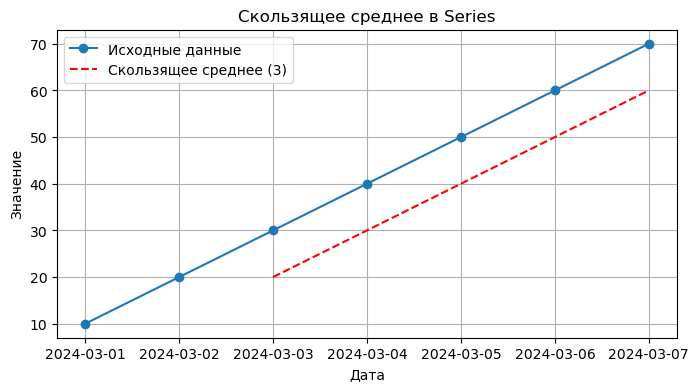

In [331]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(s, label="Исходные данные", marker="o")
plt.plot(s.rolling(window=3).mean(), label="Скользящее среднее (3)",
linestyle="--", color="red")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Скользящее среднее в Series")
plt.legend()
plt.grid()
plt.show()

28. Процентный прирост.

Метод `.pct_change()` вычисляет процентное изменение.

Каждое значени показывает насколько процентно изменился текущий элемент относительно предыдущего.

In [342]:
import pandas as pd
s = pd.Series([100, 110, 120, 90, 150])
print(s.pct_change())

0         NaN
1    0.100000
2    0.090909
3   -0.250000
4    0.666667
dtype: float64


28.1. Процентное изменение в процентах.

По умолчанию `.pct_change()` возвращает **долю изменений (0.1 = 10%)**, но можно умножить на 100, чтобы получить проценты.

In [347]:
print(s.pct_change() * 100)

0          NaN
1    10.000000
2     9.090909
3   -25.000000
4    66.666667
dtype: float64


28.2. Изменение с другим интервалом (периодом).

По умолчанию `.pct_change()` сравнивает каждое значение  с предыдущим (`periods=1`). Можно задать больший шаг (`periods=n`), чтобы вычислить изменение **по сравнению с n шагов назад**.

In [351]:
print(s.pct_change(periods=2))

0         NaN
1         NaN
2    0.200000
3   -0.181818
4    0.250000
dtype: float64


28.3. Применение `.pct_change()` к временным рядам.

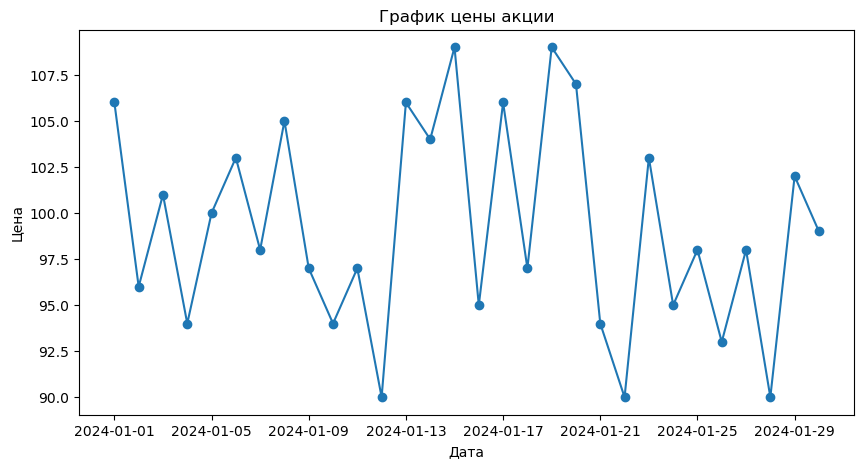

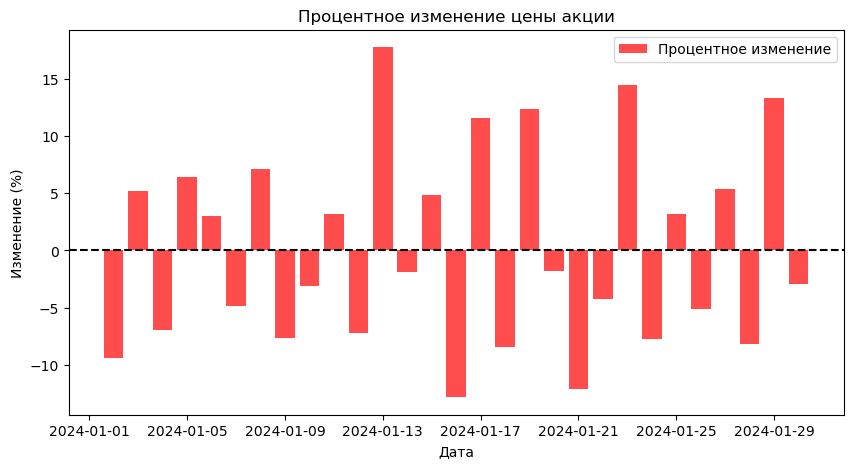

In [354]:
import numpy as np
import matplotlib.pyplot as plt
dates = pd.date_range(start="2024-01-01", periods=30, freq="D")
prices = pd.Series(np.random.randint(90, 110, size=30), index=dates)
returns = prices.pct_change() * 100
plt.figure(figsize=(10, 5))
plt.plot(prices, label="Цена акции", marker="o")
plt.ylabel("Цена")
plt.xlabel("Дата")
plt.title("График цены акции")
plt.figure(figsize=(10, 5))
plt.bar(returns.index, returns, color="red", alpha=0.7,
label="Процентное изменение")
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("Изменение (%)")
plt.xlabel("Дата")
plt.title("Процентное изменение цены акции")
plt.legend()
plt.show()

29. Создание Series на основе данных из внешних файлов.

29.1. Загрузка данных из CSV-файла.

In [368]:
import pandas as pd
df = pd.read_csv("data.csv", header=None, names=["Дата", "Цена"])
s=df["Цена"]
print(s)

0    Цена
1     100
2     120
3     140
4     125
5     115
Name: Цена, dtype: object


29.2. Чтение данных из файла с указанием индекса.

In [397]:
s = pd.read_csv("data.csv", index_col="Дата")["Цена"]
print(s)

Дата
2024-05-01    100
2024-05-02    120
2024-05-03    140
2024-05-04    125
2024-05-05    115
Name: Цена, dtype: int64
